#Task 1: K-Means Clustering

In [ ]:
import torch
from torchvision import datasets, transforms
from sklearn.metrics.cluster import normalized_mutual_info_score
import numpy as np
from scipy.spatial.distance import cdist

def load_mnist():
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    return train_dataset, test_dataset

def kmeans(X, k=10, max_iters=100):
    # Random Intialization of centroids
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iters):
        # Assigning each point to closest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)

        # calculating the new centroids
        new_centroids = []
        for i in range(k):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                centroid_mean = np.mean(points_in_cluster, axis=0, keepdims=True)
                new_centroids.append(centroid_mean)
            else:
                new_centroids.append(centroids[i])


        new_centroids = np.vstack(new_centroids)

        # Checking if no update is required for centroids
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels

def evaluate_nmi(labels_true, labels_pred):
    nmi = normalized_mutual_info_score(labels_true, labels_pred)
    return nmi

def main():
    train_dataset, test_dataset = load_mnist()

    X_train = train_dataset.data.numpy().reshape(len(train_dataset), -1)
    y_train = train_dataset.targets.numpy()

    # Cluster the training data
    labels_pred = kmeans(X_train)

    # Evaluate NMI
    nmi = evaluate_nmi(y_train, labels_pred)
    print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

if __name__ == "__main__":
    main()


Normalized Mutual Information (NMI): 0.5125


**#BONUS**

**Exploring the effect of different values of k on K-means algorithm**

I have applied K-Means algorithm for k=2,4,6,8,10. It is observed that the more the number of cluster is increased the betetr the NMI score became. This is because of the fact that as K is increased the chance of entering for a digit to its actual class also increases. As there is total 10 classes of digits ,so the NMI score is highest when K=10 and lowest at K=2.

For k=2, Normalized Mutual Information (NMI): 0.1612
For k=4, Normalized Mutual Information (NMI): 0.3744
For k=6, Normalized Mutual Information (NMI): 0.4496
For k=8, Normalized Mutual Information (NMI): 0.4540
For k=10, Normalized Mutual Information (NMI): 0.4943


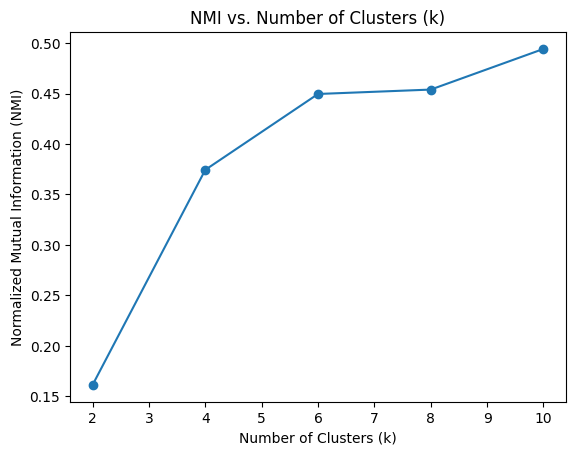

In [ ]:
import torch
from torchvision import datasets, transforms
from sklearn.metrics.cluster import normalized_mutual_info_score
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def load_mnist():
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    return train_dataset, test_dataset

def kmeans(X, k, max_iters=100):
    # Random Intialization of centroids
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iters):
        # Assigning each point to closest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)

        # calculating the new centroids
        new_centroids = []
        for i in range(k):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                centroid_mean = np.mean(points_in_cluster, axis=0, keepdims=True)
                new_centroids.append(centroid_mean)
            else:
                new_centroids.append(centroids[i])


        new_centroids = np.vstack(new_centroids)

        # Checking if no update is required for centroids
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels

def evaluate_nmi(labels_true, labels_pred):
    nmi = normalized_mutual_info_score(labels_true, labels_pred)
    return nmi

def main():
    train_dataset, test_dataset = load_mnist()

    X_train = train_dataset.data.numpy().reshape(len(train_dataset), -1)
    y_train = train_dataset.targets.numpy()

    k_values = [2, 4, 6, 8,10]  # Add more values if needed
    nmi_values = []

    # Try different values of k
    for k in k_values:
        # Cluster the training data
        labels_pred = kmeans(X_train, k)

        # Evaluate NMI
        nmi = evaluate_nmi(y_train, labels_pred)
        nmi_values.append(nmi)

        print(f"For k={k}, Normalized Mutual Information (NMI): {nmi:.4f}")

    # Plot the results
    plt.plot(k_values, nmi_values, marker='o')
    plt.title('NMI vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Normalized Mutual Information (NMI)')
    plt.show()

if __name__ == "__main__":
    main()





#Task 2- K-Nearest Neighbors (KNN) Classification

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np

def load_mnist():
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    return train_dataset, test_dataset

def knn_predict(X_train, y_train, X_test, k=5):
    # Euclidean distance
    distances = np.linalg.norm(X_train - X_test, axis=1)

    # Find indices of k-nearest neighbors
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]

    # Get labels of nearest neighbors
    nearest_labels = y_train[nearest_indices]

    # Count occurrences of each label among nearest neighbors using a dictionary
    label_counts_dict = {}
    for label in nearest_labels:
        label_counts_dict[label] = label_counts_dict.get(label, 0) + 1

    # Find the label with the maximum count (most common label)
    predicted_label = max(label_counts_dict, key=label_counts_dict.get)

    # Final prediction
    prediction = predicted_label

    return prediction


# Evaluation function
def evaluate_knn(train_dataset, test_dataset, k=5, num_samples=100):
    X_train = train_dataset.data.numpy().reshape(len(train_dataset), -1)
    y_train = train_dataset.targets.numpy()

    X_test = test_dataset.data.numpy().reshape(len(test_dataset), -1)
    y_test = test_dataset.targets.numpy()

    correct = 0

    for i in range(num_samples):
        prediction = knn_predict(X_train, y_train, X_test[i], k)
        correct += (prediction == y_test[i])

    accuracy = correct / num_samples
    return accuracy

def main():
    train_dataset, test_dataset = load_mnist()
    accuracy = evaluate_knn(train_dataset, test_dataset, k=5, num_samples=100)
    print(f"Accuracy: {accuracy * 100:.2f}%")

if __name__ == "__main__":
    main()


Accuracy: 57.00%


#BONUS
Exploring KNN algorithm on different values of k

I have used k=1,3,5,7,9 to evaluate KNN algorithm and found that as the value of K increases, the accuracy drops.Beacuse ,as k increases, the decision boundary becomes smoother, potentially oversimplifying the model and causing it to generalize poorly.n high-dimensional spaces, as k increases, the concept of "closeness" becomes less meaningful due to the curse of dimensionality.


For k=1, Accuracy: 64.00%
For k=3, Accuracy: 56.00%
For k=5, Accuracy: 57.00%
For k=7, Accuracy: 52.00%
For k=9, Accuracy: 51.00%


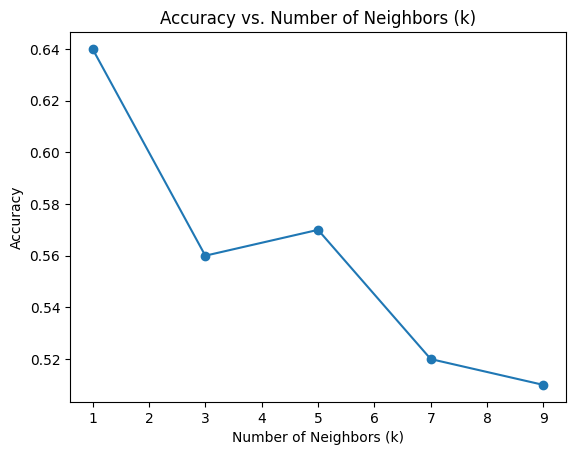

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

def load_mnist():
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    return train_dataset, test_dataset

def knn_predict(X_train, y_train, X_test, k):
    # Euclidean distance
    distances = np.linalg.norm(X_train - X_test, axis=1)

    # Find indices of k-nearest neighbors
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]

    # Get labels of nearest neighbors
    nearest_labels = y_train[nearest_indices]

    # Count occurrences of each label among nearest neighbors using a dictionary
    label_counts_dict = {}
    for label in nearest_labels:
        label_counts_dict[label] = label_counts_dict.get(label, 0) + 1

    # Find the label with the maximum count (most common label)
    predicted_label = max(label_counts_dict, key=label_counts_dict.get)

    # Final prediction
    prediction = predicted_label

    return prediction


# Evaluation function
def evaluate_knn(train_dataset, test_dataset, k, num_samples=100):
    X_train = train_dataset.data.numpy().reshape(len(train_dataset), -1)
    y_train = train_dataset.targets.numpy()

    X_test = test_dataset.data.numpy().reshape(len(test_dataset), -1)
    y_test = test_dataset.targets.numpy()

    correct = 0

    for i in range(num_samples):
        prediction = knn_predict(X_train, y_train, X_test[i], k)
        correct += (prediction == y_test[i])

    accuracy = correct / num_samples
    return accuracy

def main():
    train_dataset, test_dataset = load_mnist()

    X_train = train_dataset.data.numpy().reshape(len(train_dataset), -1)
    y_train = train_dataset.targets.numpy()

    X_test = test_dataset.data.numpy().reshape(len(test_dataset), -1)
    y_test = test_dataset.targets.numpy()

    k_values = [1, 3, 5, 7, 9] #different values of k
    accuracy_values = []

    for k in k_values:
        accuracy = evaluate_knn(train_dataset, test_dataset, k, num_samples=100)
        print(f"For k={k}, Accuracy: {accuracy * 100:.2f}%")
        accuracy_values.append(accuracy)
    plt.plot(k_values, accuracy_values, marker='o')
    plt.title('Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.show()

if __name__ == "__main__":
    main()

